In [2]:
import pandas as pd
df=pd.read_csv('Desktop/datas/day.csv')

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
#!pip install scipy

In [5]:
#!pip install researchpy

In [6]:
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt


In [7]:
#!pip install statsmodel
import statsmodels.api as sm

In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
df.shape

(731, 16)

In [10]:
df=df[['season','mnth','holiday','workingday','weathersit','temp','cnt']]
df

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600
...,...,...,...,...,...,...,...
726,1,12,0,1,2,0.254167,2114
727,1,12,0,1,2,0.253333,3095
728,1,12,0,0,2,0.253333,1341
729,1,12,0,0,1,0.255833,1796


In [11]:
df.to_csv('Desktop/datas/ttestmain.csv')

In [12]:
df['season'].unique()  #1:spring 2:summer 3:fall 4:winer

array([1, 2, 3, 4], dtype=int64)

In [13]:
df['workingday'].unique() #0:no 1:yes

array([0, 1], dtype=int64)

In [14]:
df['holiday'].unique() 

array([0, 1], dtype=int64)

In [15]:
df['weathersit'].unique() #1:clear 2:misty/cloudy 3:rain/snow

array([2, 1, 3], dtype=int64)

In [16]:
df['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

In [17]:
df.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


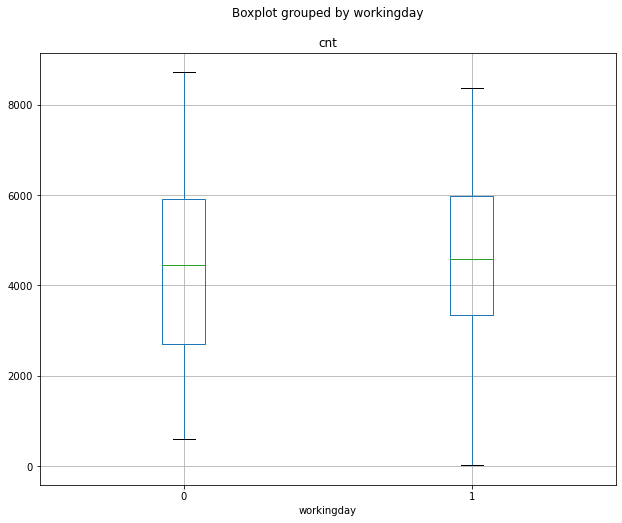

In [18]:
df.boxplot(column='cnt', by='workingday', figsize=(10,8))  
#the center lines are medians , and boxes are interquartile range
#medians of both are almost equal 

# Independent T-Test

In [19]:
#SEPERATING WORKING DAYS AND NON WORKING DAYS
#working days
wd=df[(df['workingday'])==1]
nd=df[(df['workingday'])==0]

In [20]:
wd.shape , nd.shape
#there are 500 working day entries , whereas 231 non working days entries

((500, 7), (231, 7))

In [21]:
#making the sapes equal for both to carry on with t test
wd=wd.sample(231)
wd.shape , nd.shape

((231, 7), (231, 7))

In [22]:
#making sure assumptions for t-test are satisfied
#1st assumption: variance of the 2 groups are the same
#2nd assumption: The residual(difference) distribution between 2 groups should be a normal distribution


In [53]:
#implememting leven`s test to ensure variances of both groups are the same(like t-test for varieance instead of mean)
#therefore , here null hypothesis is"variance for both groups are same" , and Alternative hypothesis is :"variances are different"
from scipy.stats import levene
levene(wd['cnt'], nd['cnt'])
#here threshhold for p-val is considered to be 5%
# p-val is ** , (which is  above threshold) . Therefor we accept null hypothesis


LeveneResult(statistic=1.8709429770899735, pvalue=0.17203495596570065)

(array([ 7., 14., 26., 29., 46., 30., 31., 26., 15.,  7.]),
 array([-2.236779  , -1.78754975, -1.33832049, -0.88909124, -0.43986199,
         0.00936727,  0.45859652,  0.90782577,  1.35705503,  1.80628428,
         2.25551353]),
 <a list of 10 Patch objects>)

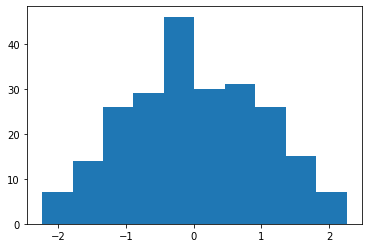

In [26]:
#scale standardises i.e , substracts mean from every value and devides by  standard deviation

diff=scale(np.array(wd['cnt'],dtype=np.float)-np.array(nd['cnt']))
plt.hist(diff)
#graph shows approx normal distribution

((array([-2.74820355, -2.443536  , -2.27031515, -2.14650365, -2.04884608,
         -1.96753541, -1.89747051, -1.83564473, -1.78013074, -1.72961593,
         -1.68316442, -1.64008441, -1.59984954, -1.56204955, -1.52635826,
         -1.49251184, -1.46029372, -1.42952388, -1.40005094, -1.37174634,
         -1.34449997, -1.3182167 , -1.2928138 , -1.26821883, -1.24436797,
         -1.22120473, -1.1986788 , -1.17674522, -1.15536359, -1.13449752,
         -1.11411405, -1.09418326, -1.0746779 , -1.05557306, -1.03684594,
         -1.01847555, -1.0004426 , -0.98272925, -0.96531899, -0.94819653,
         -0.93134765, -0.9147591 , -0.89841853, -0.8823144 , -0.8664359 ,
         -0.85077291, -0.83531591, -0.82005595, -0.80498461, -0.79009394,
         -0.77537643, -0.76082498, -0.74643289, -0.73219376, -0.71810157,
         -0.70415057, -0.69033529, -0.67665053, -0.66309134, -0.64965297,
         -0.63633092, -0.62312085, -0.61001864, -0.59702033, -0.58412211,
         -0.57132035, -0.55861155, -0.

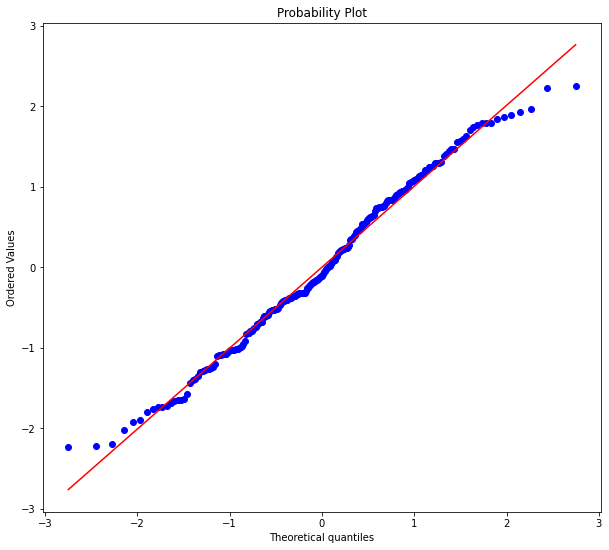

In [27]:
#another way to check if distribution is normal qqp-lot/probability-plot
#here we evaluate residuals bet. 2 groups i.e working and non working , stored in "diff" variable
from scipy.stats import probplot
plt.figure(figsize=(10,9))
probplot(diff, plot=plt, dist='norm')
#thus almost all values(blue dots) are very close to  normal distribution(red line) thus it satisfies the second contition

In [39]:
#from scipy.stats import shapiro
#shapiro(diff)

In [36]:
#performing ttest
from scipy.stats import ttest_ind
ttest_ind(wd['cnt'],nd['cnt'])
#p val is aloost 29% 
#therefore , we can infer that wheather its a working day or not , has no effect on number of bikes shared.

Ttest_indResult(statistic=1.0609635678578497, pvalue=0.2892631798227813)

In [29]:

#!pip install researchpy 0

In [31]:
import researchpy as rp
descr,result=rp.ttest(wd['cnt'],nd['cnt'])

In [32]:
descr

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4527.151515,1936.889445,127.437969,4276.056435,4778.246595
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4428.660173,1995.619533,92.844623,4246.209048,4611.111298


In [33]:
result

,Independent t-test,results
0,Difference (cnt - cnt) =,196.9827
1,Degrees of freedom =,460.0000
2,t =,1.0610
3,Two side test p value =,0.2893
4,Difference < 0 p value =,0.8554
5,Difference > 0 p value =,0.1446
6,Cohen's d =,0.0987
7,Hedge's g =,0.0986
8,Glass's delta =,0.1017
9,Preasron's r =,0.0494


# therefore , we can infer that wheather its a working day or not , has no effect on number of bikes shared.

# Welch s T-Test

In [54]:
df.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


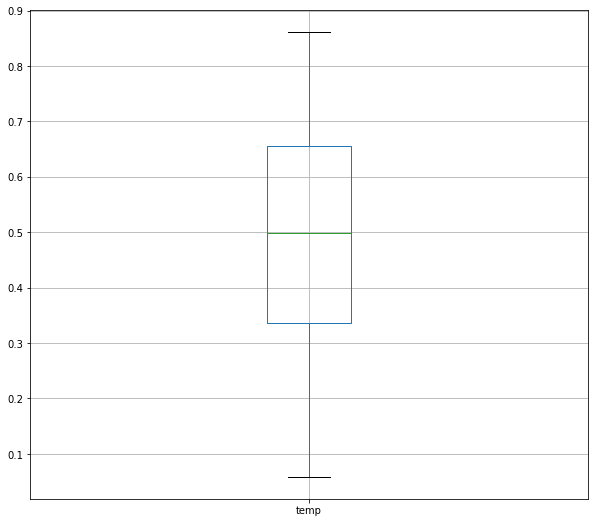

In [57]:
#lets do t test for temprature
#temprature data is continutous , thus convert it into categorical data
df[['temp']].boxplot(figsize=(10,9))
#so, we cn see that the data has been scaled between 0 to 1 and median is 0.5

In [62]:
#adding new column called 'tmp_cat' , which is true if temp is above mean temp , else false
df['tmp_cat']=df['temp'] > df['temp'].mean()

<ipython-input-62-9a6036d88891>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tmp_cat']=df['temp'] > df['temp'].mean()


In [65]:
df.head

<bound method NDFrame.head of      season  mnth  holiday  workingday  weathersit      temp   cnt  tmp_cat
0         1     1        0           0           2  0.344167   985    False
1         1     1        0           0           2  0.363478   801    False
2         1     1        0           1           1  0.196364  1349    False
3         1     1        0           1           1  0.200000  1562    False
4         1     1        0           1           1  0.226957  1600    False
..      ...   ...      ...         ...         ...       ...   ...      ...
726       1    12        0           1           2  0.254167  2114    False
727       1    12        0           1           2  0.253333  3095    False
728       1    12        0           0           2  0.253333  1341    False
729       1    12        0           0           1  0.255833  1796    False
730       1    12        0           1           2  0.215833  2729    False

[731 rows x 8 columns]>

In [67]:
hot=df[df['tmp_cat']==True]
cold=df[df['tmp_cat']==False]
hot.shape , cold.shape


((367, 8), (364, 8))

In [68]:
hot=hot.sample(364)
hot.shape , cold.shape


((364, 8), (364, 8))

In [70]:
from scipy.stats import levene
levene(hot['cnt'],cold['cnt'])
#p val is 0.3 thus, variances are different , first condition is NOT satisfied

LeveneResult(statistic=4.4083190967907235, pvalue=0.036108675111894584)

(array([ 5., 17., 23., 33., 68., 60., 72., 36., 32., 18.]),
 array([-2.66059592, -2.18222445, -1.70385299, -1.22548152, -0.74711006,
        -0.2687386 ,  0.20963287,  0.68800433,  1.1663758 ,  1.64474726,
         2.12311872]),
 <a list of 10 Patch objects>)

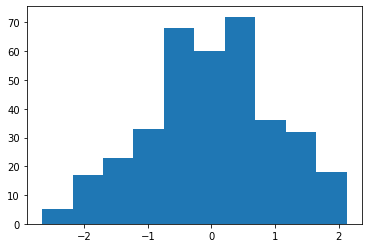

In [71]:
diff=scale(np.array(hot['cnt'])-np.array(cold['cnt']))
plt.hist(diff)
#residuals are normally distributed , thus second condition is satisfied

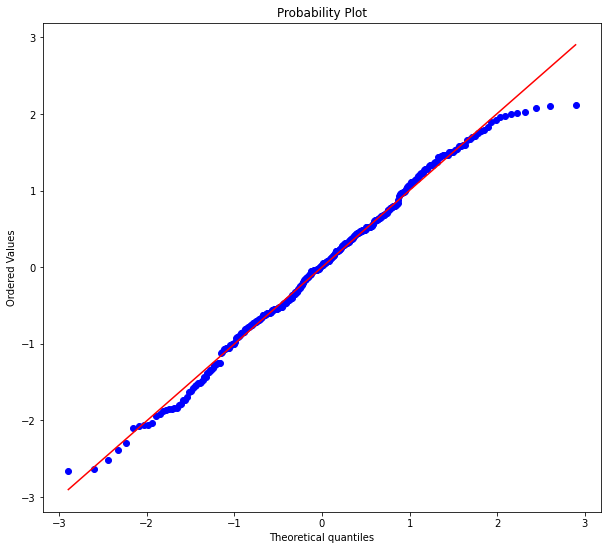

In [73]:
plt.figure(figsize=(10,9))
probplot(diff,plot=plt)
plt.show()

In [74]:
shapiro(diff)
#normally distributed

ShapiroResult(statistic=0.9919518232345581, pvalue=0.046003665775060654)

In [75]:
ttest_ind(hot['cnt'],cold['cnt'])
#p-value is really  small i.e .....e-65

Ttest_indResult(statistic=18.913862885538453, pvalue=3.5795152511480132e-65)

In [78]:
from researchpy import ttest
des,res=ttest(hot['cnt'],cold['cnt'],equal_variances=False)
res
#p value is 0 thus, hot or cold dAY makes significant difference in number of bikes shared

,Welch's t-test,results
0,Difference (cnt - cnt) =,2227.9286
1,Degrees of freedom =,715.3513
2,t =,18.9139
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.4020
7,Hedge's g =,1.4005
8,Glass's delta =,1.5055
9,Preasron's r =,0.5774


# hot or cold dAY makes significant difference in number of bikes shared